In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-pricing-with-advance-regression-techniques/house-pricing-with-advance-regression-methods.ipynb
/kaggle/input/house-pricing-with-advance-regression-techniques/submission1.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

In [4]:
# Load Dataset
df = pd.read_csv("/kaggle/input/house-pricing-with-advance-regression-techniques/submission1.csv")

# Show first rows
print(df.head())

# Shape of dataset
print("\nDataset shape:", df.shape)

     Id      SalePrice
0  1461  156633.390588
1  1462  195762.895873
2  1463  217506.844296
3  1464  230249.357588
4  1465  240294.658327

Dataset shape: (1459, 2)


In [5]:
# Data Overview & Visualization
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


In [6]:
print("\nStatistics:")
print(df.describe())


Statistics:
                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  226286.776933
std     421.321334   72678.636448
min    1461.000000   57416.067923
25%    1825.500000  175968.559434
50%    2190.000000  211504.913430
75%    2554.500000  264599.912567
max    2919.000000  597911.686302


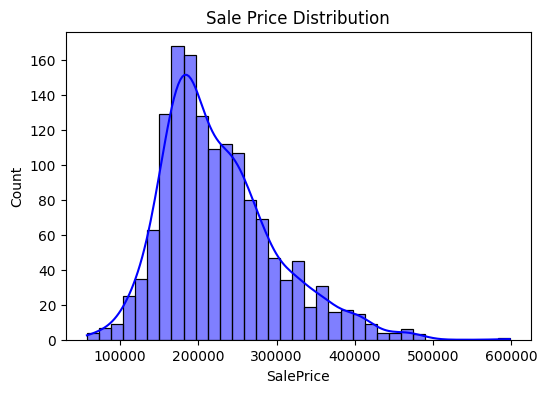

In [7]:
# Visualize SalePrice distribution
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title("Sale Price Distribution")
plt.show()

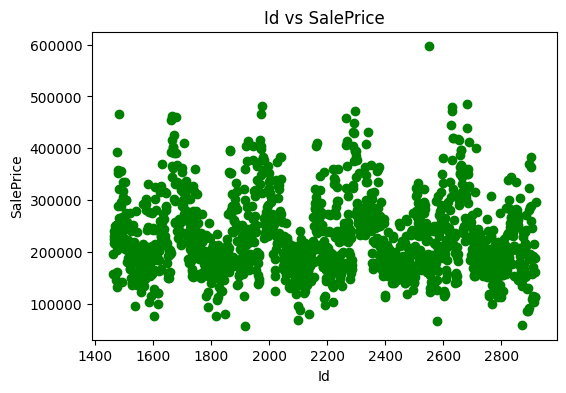

In [8]:
# Scatter plot for Id vs SalePrice
plt.figure(figsize=(6,4))
plt.scatter(df['Id'], df['SalePrice'], color='green')
plt.title("Id vs SalePrice")
plt.xlabel("Id")
plt.ylabel("SalePrice")
plt.show()

In [9]:
# Prepare Data (Here 'Id' is just an identifier, not a feature)
X = df[['Id']]  # using only Id just for demonstration (replace with real features for better model)
y = df['SalePrice']

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train 5 Best ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = (rmse, r2)

# Show Results
results_df = pd.DataFrame(results, index=["RMSE", "R2"]).T
print("\nModel Performance:")
print(results_df.sort_values("R2", ascending=False))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 1
[LightGBM] [Info] Start training from score 227693.195768

Model Performance:
                           RMSE        R2
Random Forest      50443.487563  0.490073
Gradient Boosting  54255.938230  0.410081
XGBoost            55135.641209  0.390796
LightGBM           55510.941171  0.382475
Linear Regression  70691.107986 -0.001445


In [12]:
# Pick the Best Model
best_model_name = results_df.sort_values("R2", ascending=False).index[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Retrain best model
best_model.fit(X_train, y_train)
best_preds = best_model.predict(X_test)


Best Model: Random Forest


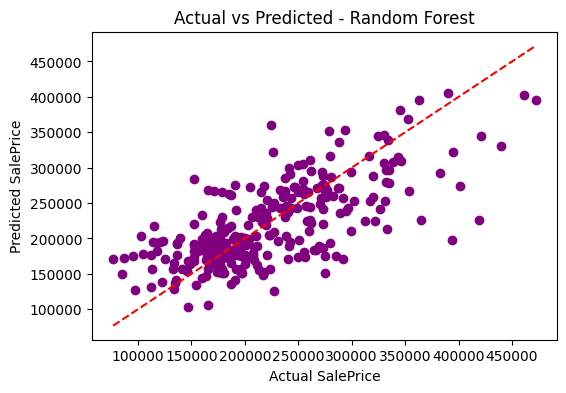

In [13]:
# Visualize Predictions from Best Model
plt.figure(figsize=(6,4))
plt.scatter(y_test, best_preds, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()